In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('company.csv',na_values = ['#NAME?'])
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [3]:
df.isnull().sum().sort_values(ascending=False)

Salary     24
Age        18
Place      14
Company     8
Gender      0
Country     0
dtype: int64

## Preprocessing

In [4]:
from sklearn.preprocessing import Imputer

In [7]:
#fill missing value with mean
df1 = pd.read_csv('company.csv',usecols = ['Company','Age','Salary','Place','Gender'],na_values = ['#NAME?'])
df1.isnull().sum().sort_values(ascending=False)

Salary     24
Age        18
Place      14
Company     8
Gender      0
dtype: int64

In [14]:
#imp = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
#imp.fit(df1)
imp=Imputer(missing_values="NaN", strategy="mean",axis=0)
imp.fit(df1['Salary'])
df1['Salary']=imp.transform(df1['Salary'])


ValueError: Expected 2D array, got 1D array instead:
array=[  nan   nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000.   nan 1089.
   nan 1234. 3000. 3000. 3030. 5000.   nan   nan 3045. 3184. 4824. 5835.
 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034. 5034. 8202. 9024.
   nan   nan 2300. 3000. 4345. 5000. 6000. 7000. 8000. 9000.   nan 1089.
   nan 1234. 3000. 3000. 3030. 5000. 6544. 7654. 3045. 3184. 4824. 5835.
 7084. 8943. 8345. 9284. 6543. 2034.   nan 2934. 4034. 5034. 8202. 9024.
   nan   nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000.   nan 1089.
   nan 1234. 3000. 3000. 3030. 5000.   nan   nan 3045. 3184. 4824. 5835.
 7084. 8943. 8345. 9284.   nan 2034.   nan 2934. 4034. 5034. 8202. 9024.
   nan   nan 2300. 3234. 4324. 5435. 5555. 8787. 8787. 9876.   nan 1089.
   nan 1234. 3234. 3454. 8787. 5654. 5009. 5098. 3045. 3184. 4824. 5835.
 7084. 8943. 8345. 9284.   nan 2034. 3033. 2934. 4034. 5034. 8202. 9024.
 8787. 4034. 5034. 8202.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
#repalce missing vvalue with mean
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Age']

0      20.000000
1      30.000000
2      35.000000
3      40.000000
4      23.000000
5      30.484615
6      30.484615
7      23.000000
8      34.000000
9      45.000000
10     23.000000
11     34.000000
12     45.000000
13     18.000000
14     40.000000
15     23.000000
16     23.000000
17     34.000000
18     22.000000
19     32.000000
20     37.000000
21     50.000000
22     21.000000
23     30.484615
24     30.484615
25     23.000000
26     34.000000
27     45.000000
28     23.000000
29     35.000000
         ...    
118    22.000000
119    33.000000
120    44.000000
121     0.000000
122    44.000000
123    30.484615
124    22.000000
125    33.000000
126    20.000000
127    30.000000
128    33.000000
129    50.000000
130    21.000000
131    30.484615
132    30.484615
133    22.000000
134    31.000000
135    40.000000
136    30.484615
137    31.000000
138    44.000000
139    22.000000
140    44.000000
141    33.000000
142    22.000000
143    33.000000
144    22.000000
145    44.0000

In [17]:
#repalce missing value with mean 
df1['Salary'] = df1['Salary'].fillna(df1['Salary'].mean())
df1['Salary']

0      5312.467742
1      5312.467742
2      2300.000000
3      3000.000000
4      4000.000000
5      5000.000000
6      6000.000000
7      7000.000000
8      8000.000000
9      9000.000000
10     5312.467742
11     1089.000000
12     5312.467742
13     1234.000000
14     3000.000000
15     3000.000000
16     3030.000000
17     5000.000000
18     5312.467742
19     5312.467742
20     3045.000000
21     3184.000000
22     4824.000000
23     5835.000000
24     7084.000000
25     8943.000000
26     8345.000000
27     9284.000000
28     9876.000000
29     2034.000000
          ...     
118    5312.467742
119    1089.000000
120    5312.467742
121    1234.000000
122    3234.000000
123    3454.000000
124    8787.000000
125    5654.000000
126    5009.000000
127    5098.000000
128    3045.000000
129    3184.000000
130    4824.000000
131    5835.000000
132    7084.000000
133    8943.000000
134    8345.000000
135    9284.000000
136    5312.467742
137    2034.000000
138    3033.000000
139    2934.

In [18]:
df1.isnull().sum().sort_values(ascending=False)


Place      14
Company     8
Gender      0
Salary      0
Age         0
dtype: int64

In [25]:
#repalce missing value with mode since it is categorical variable (filling the missing value with frequently used value) 
df1['Place'] = df1['Place'].fillna(df1['Place'].mode())
df1['Place']

0         Chennai
1          Mumbai
2        Calcutta
3           Delhi
4          Mumbai
5        Calcutta
6         Chennai
7          Mumbai
8        Calcutta
9           Delhi
10         Mumbai
11       Calcutta
12        Chennai
13         Mumbai
14       Calcutta
15          Delhi
16     Podicherry
17         Cochin
18        Chennai
19         Mumbai
20       Calcutta
21          Delhi
22         Mumbai
23         Cochin
24        Chennai
25         Mumbai
26       Calcutta
27          Delhi
28         Mumbai
29         Cochin
          ...    
118           NaN
119         Noida
120     Hyderabad
121      Calcutta
122        Mumbai
123      Calcutta
124      Calcutta
125           NaN
126           NaN
127         Noida
128     Hyderabad
129      Calcutta
130        Mumbai
131        Mumbai
132        Cochin
133       Chennai
134        Mumbai
135      Calcutta
136         Delhi
137        Mumbai
138        Cochin
139         Noida
140     Hyderabad
141      Calcutta
142       

In [26]:
#repalce missing value with mode since it is categorical variable (filling the missing value with frequently used value) 
df1['Company'] = df1['Company'].fillna(df1['Company'].mode())
df1['Company']

0                            TCS
1                        Infosys
2                            TCS
3                        Infosys
4                            TCS
5                        Infosys
6                            TCS
7                        Infosys
8                            TCS
9                            CTS
10                           CTS
11                           CTS
12                           CTS
13                           CTS
14                       Infosys
15                           TCS
16                       Infosys
17                           TCS
18                           TCS
19                       Infosys
20                           TCS
21                       Infosys
22                           TCS
23                       Infosys
24                           TCS
25                       Infosys
26                           TCS
27                           CTS
28                           CTS
29                           CTS
          

In [28]:
#final dataframe without misssing value
df1

,Company,Age,Salary,Place,Gender
0,TCS,20.000000,5312.467742,Chennai,0
1,Infosys,30.000000,5312.467742,Mumbai,0
2,TCS,35.000000,2300.000000,Calcutta,0
3,Infosys,40.000000,3000.000000,Delhi,0
4,TCS,23.000000,4000.000000,Mumbai,0
5,Infosys,30.484615,5000.000000,Calcutta,0
6,TCS,30.484615,6000.000000,Chennai,1
7,Infosys,23.000000,7000.000000,Mumbai,1
8,TCS,34.000000,8000.000000,Calcutta,1
9,CTS,45.000000,9000.000000,Delhi,0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
Company    140 non-null object
Age        148 non-null float64
Salary     148 non-null float64
Place      134 non-null object
Gender     148 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ KB


In [31]:
#Replace gender 0 or 1 to F or M
df1.Gender.replace((0, 1), ('F', 'M'), inplace=True)
df1.Gender

0      F
1      F
2      F
3      F
4      F
5      F
6      M
7      M
8      M
9      F
10     F
11     F
12     F
13     F
14     F
15     F
16     F
17     F
18     F
19     F
20     F
21     F
22     F
23     F
24     M
25     M
26     M
27     M
28     M
29     F
      ..
118    F
119    F
120    F
121    F
122    F
123    F
124    M
125    M
126    M
127    F
128    F
129    F
130    F
131    F
132    M
133    F
134    F
135    M
136    F
137    F
138    F
139    F
140    F
141    F
142    F
143    M
144    M
145    M
146    M
147    F
Name: Gender, Length: 148, dtype: object

In [32]:
df1.describe()

,Age,Salary
count,148.000000,148.000000
mean,30.484615,5312.467742
std,10.395076,2354.305003
min,0.000000,1089.000000
25%,23.000000,3149.250000
50%,31.000000,5312.467742
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [33]:
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline
import seaborn as sns

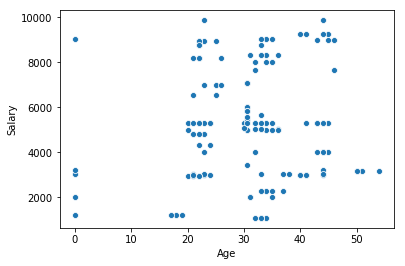

In [49]:
#Scatterplot of Age and salary
sns.scatterplot(x = df1['Age'],y = df1['Salary'])


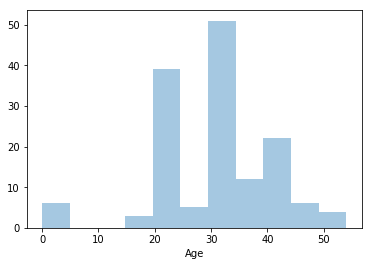

In [50]:
sns.distplot(a = df1['Age'],kde = False)


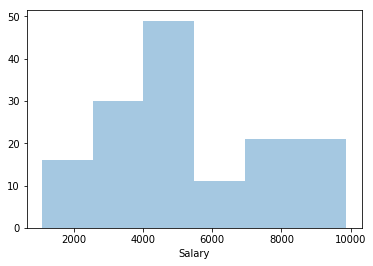

In [51]:
sns.distplot(a = df1['Salary'],kde = False)


In [47]:
#company wise breakup
df1['Company'].value_counts()

TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Infosys Pvt Lmt               2
Congnizant                    2
Name: Company, dtype: int64

In [48]:
#replace names of company
df1.Company.replace(('Tata Consultancy Services', 'Infosys Pvt Lmt','Congnizant'), ('TCS', 'Infosys','CTS'), inplace=True)
df1.Company.value_counts()

TCS        55
Infosys    47
CTS        38
Name: Company, dtype: int64

In [53]:
#City wise breakup
df1['Place'].value_counts()

Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Hyderabad      8
Noida          8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64

In [54]:
#Gender wisbreakup
df1['Gender'].value_counts()

F    115
M     33
Name: Gender, dtype: int64

In [59]:
#average salary of each company
avg = df1.groupby(by=['Company']).mean()
avg.Salary

Company
CTS        4794.109083
Infosys    5329.741935
TCS        5577.287390
Name: Salary, dtype: float64

In [60]:
#average age of emaployees
avg.Age

Company
CTS        31.631579
Infosys    31.784615
TCS        28.925035
Name: Age, dtype: float64

In [63]:
#highest salary of each company
high = df1.groupby(['Company'])['Salary'].max()
high

Company
CTS        9876.0
Infosys    8943.0
TCS        9024.0
Name: Salary, dtype: float64